In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2005-present/World Happiness Report.csv


In [2]:
df = pd.read_csv("/kaggle/input/world-happiness-report-2005-present/World Happiness Report.csv")
df.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


In [3]:
df.describe()

,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
count,2199.000000,2199.000000,2179.000000,2186.000000,2145.000000,2166.000000,2126.000000,2083.000000,2175.000000,2183.000000,1838.000000
mean,2014.161437,5.479226,9.389766,0.810679,63.294583,0.747858,0.000096,0.745195,0.652143,0.271501,0.483999
std,4.718736,1.125529,1.153387,0.120952,6.901104,0.140150,0.161083,0.185837,0.105922,0.086875,0.193071
min,2005.000000,1.281271,5.526723,0.228217,6.720000,0.257534,-0.337527,0.035198,0.178886,0.082737,0.068769
25%,2010.000000,4.646750,8.499764,0.746609,59.119999,0.656528,-0.112116,0.688139,0.571684,0.207660,0.332549
50%,2014.000000,5.432437,9.498955,0.835535,65.050003,0.769821,-0.022671,0.799654,0.663063,0.260671,0.467140
75%,2018.000000,6.309460,10.373216,0.904792,68.500000,0.859382,0.092070,0.868827,0.737936,0.322894,0.618846
max,2022.000000,8.018934,11.663788,0.987343,74.474998,0.985178,0.702708,0.983276,0.883586,0.704590,0.993604


In [4]:
df.isna().sum()

Country Name                           0
Regional Indicator                   112
Year                                   0
Life Ladder                            0
Log GDP Per Capita                    20
Social Support                        13
Healthy Life Expectancy At Birth      54
Freedom To Make Life Choices          33
Generosity                            73
Perceptions Of Corruption            116
Positive Affect                       24
Negative Affect                       16
Confidence In National Government    361
dtype: int64

In [5]:
df1 = df.dropna()
df1.isna().sum()

Country Name                         0
Regional Indicator                   0
Year                                 0
Life Ladder                          0
Log GDP Per Capita                   0
Social Support                       0
Healthy Life Expectancy At Birth     0
Freedom To Make Life Choices         0
Generosity                           0
Perceptions Of Corruption            0
Positive Affect                      0
Negative Affect                      0
Confidence In National Government    0
dtype: int64

In [6]:
df1.tail()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
2193,Zimbabwe,Sub-Saharan Africa,2017,3.638300,7.754387,0.754147,52.150002,0.752826,-0.080725,0.751208,0.733641,0.224051,0.682647
2194,Zimbabwe,Sub-Saharan Africa,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726,0.550508
2195,Zimbabwe,Sub-Saharan Africa,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354,0.456455
2196,Zimbabwe,Sub-Saharan Africa,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736,0.577302
2197,Zimbabwe,Sub-Saharan Africa,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682,0.665703


In [7]:
df1.describe()


,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
count,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000,1683.000000
mean,2013.925728,5.484487,9.355232,0.812622,63.151230,0.748815,0.002644,0.750696,0.659376,0.269064,0.483957
std,4.405145,1.149633,1.154303,0.121037,7.178640,0.136542,0.162249,0.185503,0.105602,0.081819,0.192992
min,2005.000000,2.178809,5.526723,0.290934,6.720000,0.260069,-0.337527,0.035198,0.178886,0.094316,0.078787
25%,2010.000000,4.620406,8.427542,0.743757,58.420000,0.659158,-0.106054,0.698389,0.578062,0.208157,0.333443
50%,2014.000000,5.431614,9.508173,0.839280,65.000000,0.768174,-0.021610,0.806596,0.670486,0.259691,0.468150
75%,2018.000000,6.319366,10.316836,0.909040,68.924999,0.856921,0.095830,0.874650,0.744015,0.318330,0.618612
max,2021.000000,7.970892,11.663788,0.987343,74.349998,0.985178,0.702708,0.983276,0.883586,0.606713,0.993604


In [8]:
print(df1["Regional Indicator"].unique())

['South Asia' 'Central and Eastern Europe' 'Latin America and Caribbean'
 'Commonwealth of Independent States' 'North America and ANZ'
 'Western Europe' 'Sub-Saharan Africa' 'Southeast Asia'
 'Middle East and North Africa' 'East Asia']


In [9]:
df2 = df1.loc[(df1["Regional Indicator"] == "Southeast Asia"),

               ["Country Name","Year","Life Ladder","Log GDP Per Capita","Social Support","Healthy Life Expectancy At Birth",
                "Freedom To Make Life Choices","Perceptions Of Corruption","Confidence In National Government"]]
df2.head()

,Country Name,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Perceptions Of Corruption,Confidence In National Government
295,Cambodia,2008,4.462164,7.874457,0.619264,58.32,0.914173,0.888392,0.737532
296,Cambodia,2009,4.110626,7.860245,0.818258,58.66,0.937233,0.964779,0.902667
297,Cambodia,2010,4.141072,7.903593,0.697164,59.00,0.940131,0.895714,0.895581
298,Cambodia,2011,4.161225,7.957363,0.715519,59.34,0.927462,0.775356,0.901220
299,Cambodia,2012,3.898707,8.013453,0.605529,59.68,0.955596,0.890136,0.825173


In [10]:
df3 = df1.loc[(df1["Regional Indicator"] == "South Asia"),

               ["Country Name","Year","Life Ladder","Log GDP Per Capita","Social Support","Healthy Life Expectancy At Birth",
                "Freedom To Make Life Choices","Perceptions Of Corruption","Confidence In National Government"]]
df3.head()

,Country Name,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Perceptions Of Corruption,Confidence In National Government
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.881686,0.612072
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.850035,0.611545
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.706766,0.299357
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.731109,0.307386
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.775620,0.435440


In [11]:
df6 = df1.loc[(df1["Regional Indicator"] == "North America and ANZ"),

               ["Country Name","Year","Life Ladder","Log GDP Per Capita","Social Support","Healthy Life Expectancy At Birth",
                "Freedom To Make Life Choices","Perceptions Of Corruption","Confidence In National Government"]]
df6.head()

,Country Name,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Perceptions Of Corruption,Confidence In National Government
77,Australia,2007,7.285391,10.694434,0.965276,69.959999,0.890682,0.512578,0.526933
78,Australia,2008,7.253757,10.709456,0.946635,70.040001,0.915733,0.430811,0.644675
79,Australia,2010,7.450047,10.713649,0.954520,70.199997,0.932059,0.366127,0.609753
80,Australia,2011,7.405616,10.723386,0.967029,70.279999,0.944586,0.381772,0.530787
81,Australia,2012,7.195586,10.744205,0.944599,70.360001,0.935146,0.368252,0.420419


In [12]:
df7 = df1.loc[(df1["Regional Indicator"] == "Western Europe"),

               ["Country Name","Year","Life Ladder","Log GDP Per Capita","Social Support","Healthy Life Expectancy At Birth",
                "Freedom To Make Life Choices","Perceptions Of Corruption","Confidence In National Government"]]
df7.head()

,Country Name,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Perceptions Of Corruption,Confidence In National Government
92,Austria,2006,7.122211,10.836452,0.936350,69.500000,0.941382,0.490111,0.497038
93,Austria,2008,7.180954,10.881175,0.934593,69.699997,0.879069,0.613625,0.257242
94,Austria,2010,7.302679,10.855984,0.914193,69.900002,0.895980,0.546145,0.486447
95,Austria,2011,7.470513,10.881422,0.944157,70.000000,0.939356,0.702721,0.406920
96,Austria,2012,7.400689,10.883644,0.945142,70.099998,0.919704,0.770586,0.376574


In [13]:
df8 = df1.loc[(df1["Regional Indicator"] == "East Asia"),

               ["Country Name","Year","Life Ladder","Log GDP Per Capita","Social Support","Healthy Life Expectancy At Birth",
                "Freedom To Make Life Choices","Perceptions Of Corruption","Confidence In National Government"]]
df8.head()

,Country Name,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Perceptions Of Corruption,Confidence In National Government
964,Japan,2007,6.238198,10.578493,0.938148,72.639999,0.796054,0.809233,0.240006
965,Japan,2008,5.910679,10.565691,0.887304,72.760002,0.772070,0.816475,0.221201
966,Japan,2009,5.844999,10.507198,0.888357,72.879997,0.729888,0.740108,0.251778
967,Japan,2010,6.056753,10.547181,0.901925,73.000000,0.771722,0.769557,0.270271
968,Japan,2011,6.262794,10.549271,0.916704,73.120003,0.814396,0.733799,0.231064


In [14]:
df9 = df1.loc[(df1["Regional Indicator"] == "Middle East and North Africa"),

               ["Country Name","Year","Life Ladder","Log GDP Per Capita","Social Support","Healthy Life Expectancy At Birth",
                "Freedom To Make Life Choices","Perceptions Of Corruption","Confidence In National Government"]]
df9.head()

,Country Name,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Perceptions Of Corruption,Confidence In National Government
565,Egypt,2011,4.174159,9.186353,0.753394,61.759998,0.589538,0.858596,0.631789
566,Egypt,2012,4.204157,9.185754,0.736645,61.820000,0.451543,0.880383,0.601901
567,Egypt,2013,3.558520,9.184216,0.675188,61.880001,0.473775,0.913228,0.292457
568,Egypt,2014,4.885073,9.189521,0.618551,61.939999,0.577938,0.749143,0.703884
569,Egypt,2015,4.762538,9.210259,0.729744,62.000000,0.659261,0.684498,0.771613


Text(0.5, 1.0, 'Middle East and North Africa')

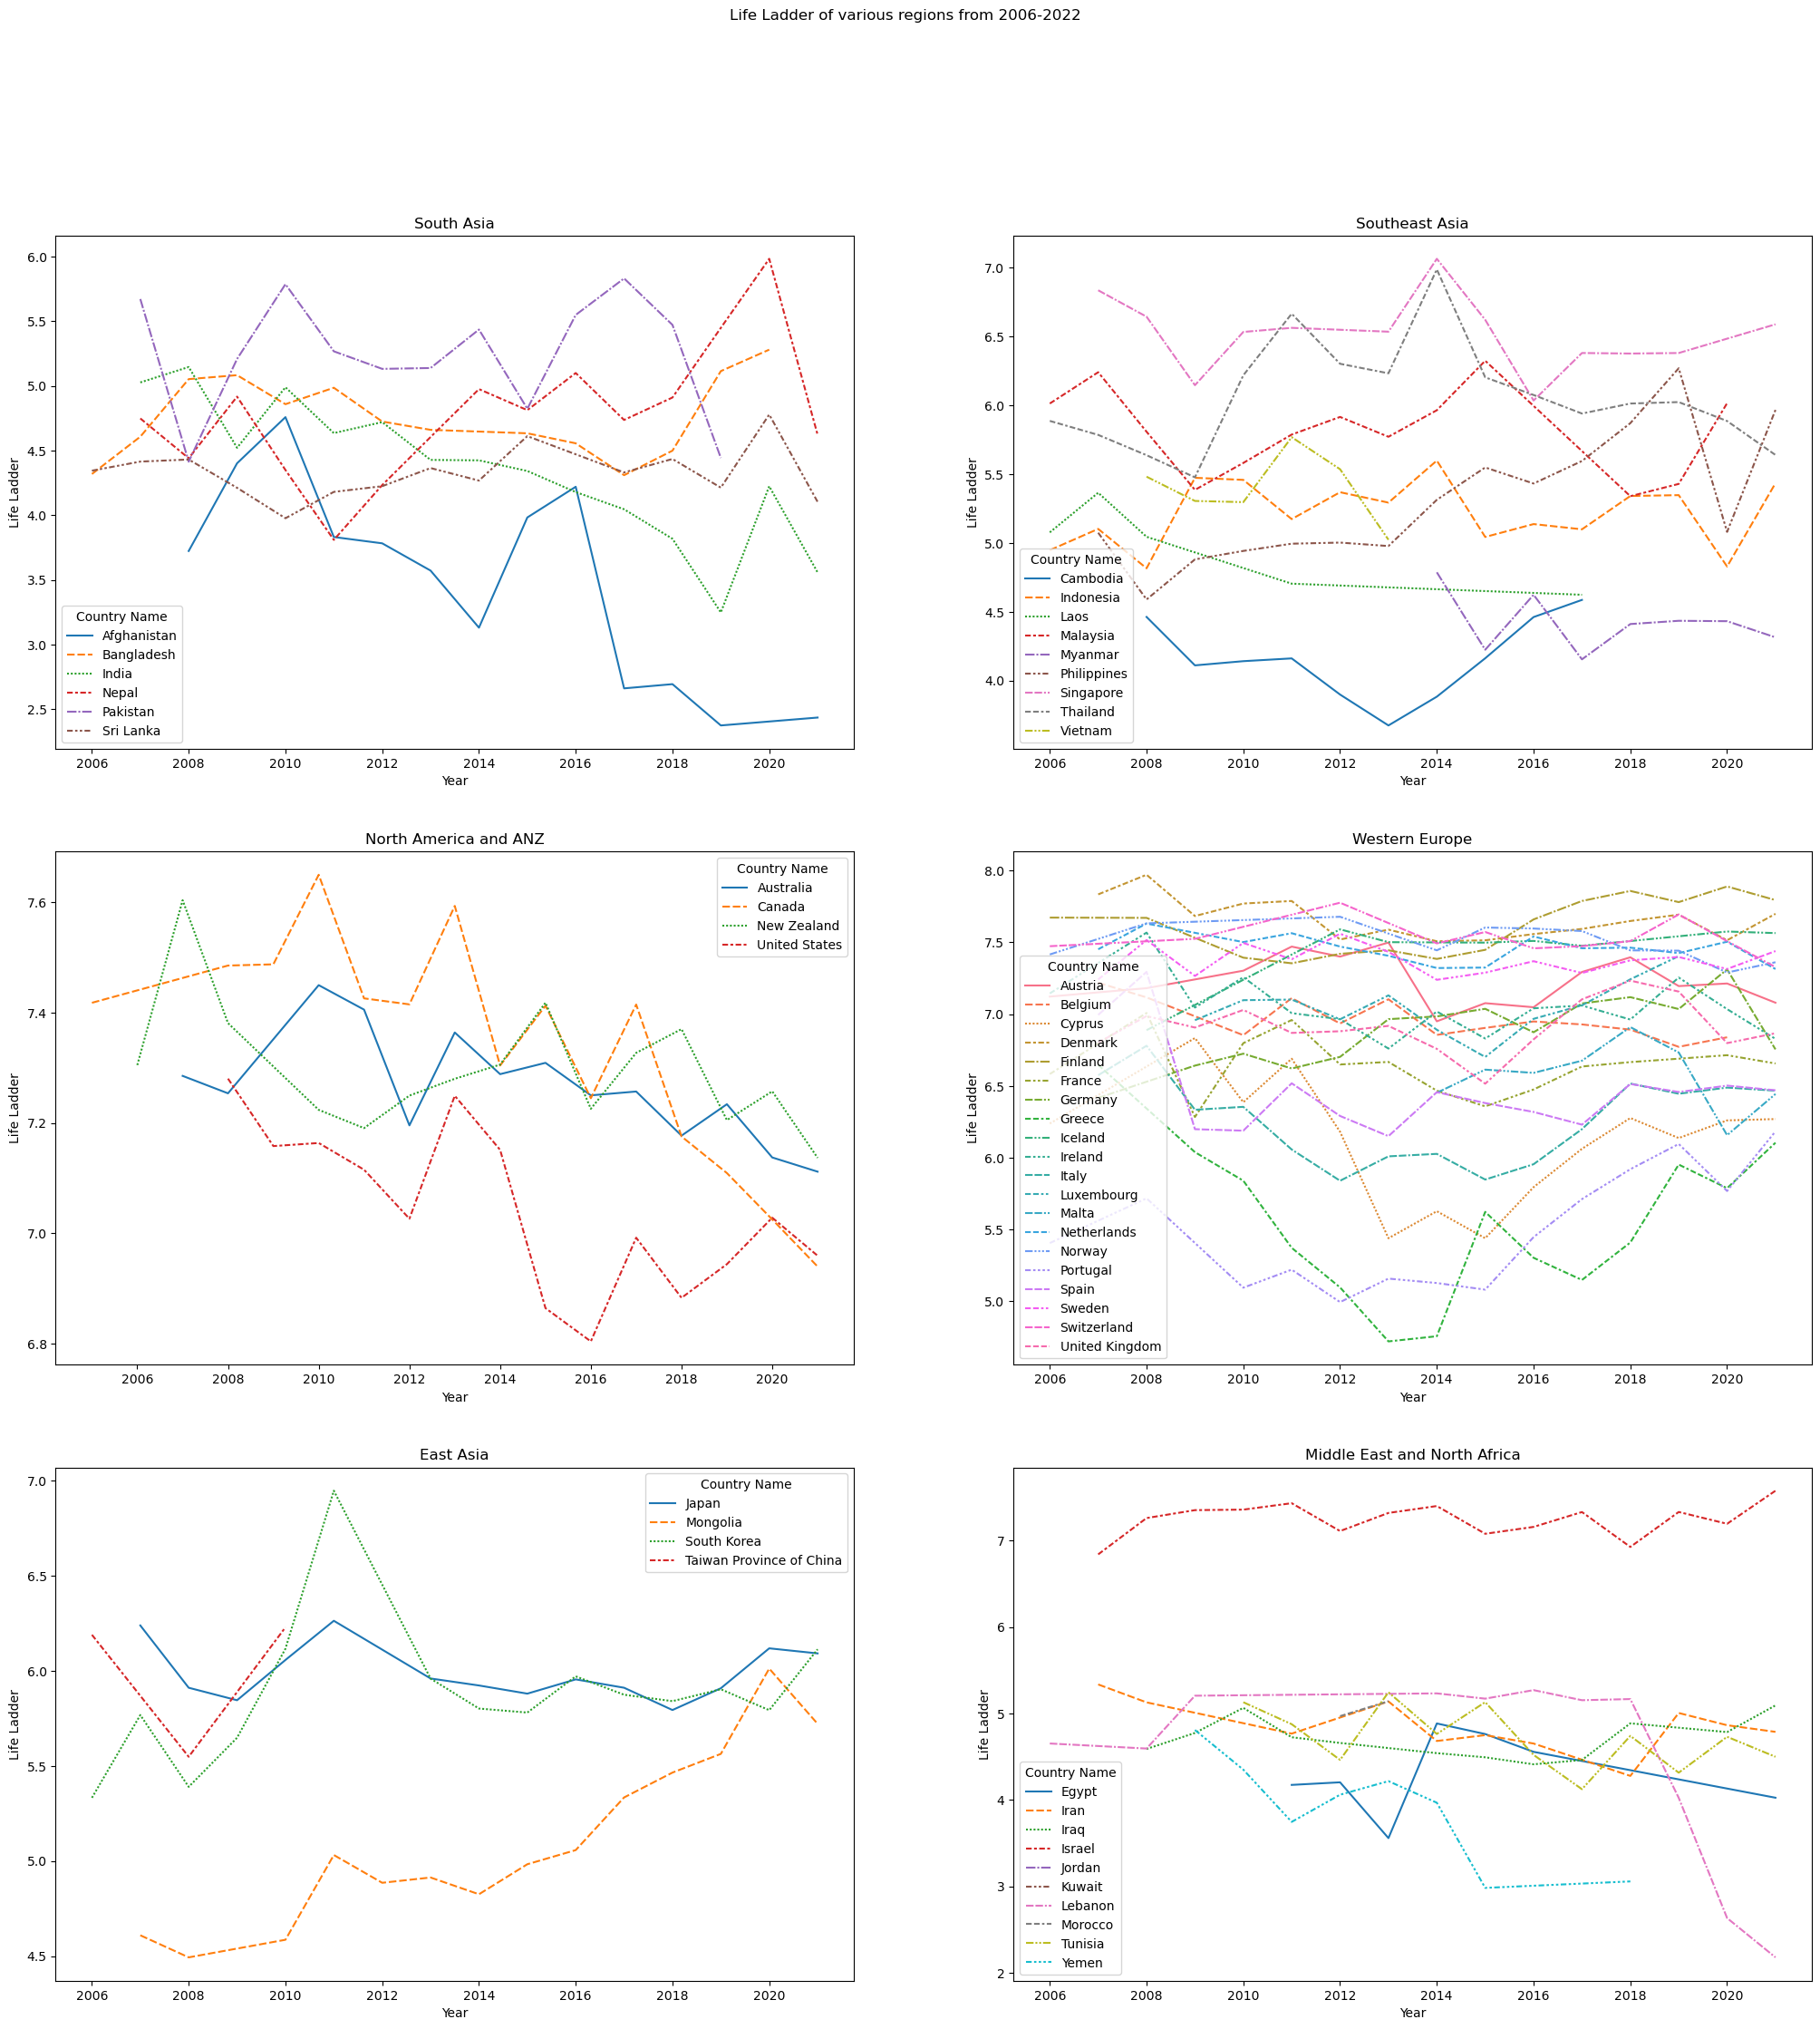

In [15]:
fig, axs = plt.subplots(3,2,figsize=(25, 25))
fig.suptitle("Life Ladder of various regions from 2006-2022")
sns.lineplot(data=df3, x=df3['Year'], y=df3['Life Ladder'], hue=df3['Country Name'], style=df3['Country Name'], ax=axs[0,0]).set_title('South Asia')
sns.lineplot(data=df2, x=df2['Year'], y=df2['Life Ladder'], hue=df2['Country Name'], style=df2['Country Name'], ax=axs[0,1]).set_title('Southeast Asia')
sns.lineplot(data=df6, x=df6['Year'], y=df6['Life Ladder'], hue=df6['Country Name'], style=df6['Country Name'], ax=axs[1,0]).set_title('North America and ANZ')
sns.lineplot(data=df7, x=df7['Year'], y=df7['Life Ladder'], hue=df7['Country Name'], style=df7['Country Name'], ax=axs[1,1]).set_title('Western Europe')
sns.lineplot(data=df8, x=df8['Year'], y=df8['Life Ladder'], hue=df8['Country Name'], style=df8['Country Name'], ax=axs[2,0]).set_title('East Asia')
sns.lineplot(data=df9, x=df9['Year'], y=df9['Life Ladder'], hue=df9['Country Name'], style=df9['Country Name'], ax=axs[2,1]).set_title('Middle East and North Africa')


In [73]:
df10 = df1.loc[(df1["Year"] == 2021) & (df1["Life Ladder"]>7),

               ["Country Name","Year","Life Ladder","Log GDP Per Capita","Social Support","Healthy Life Expectancy At Birth",
                "Freedom To Make Life Choices","Perceptions Of Corruption","Confidence In National Government"]]
df10 = df10.sort_values('Life Ladder',ascending=False, ignore_index=True)
df10.head()

,Country Name,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Perceptions Of Corruption,Confidence In National Government
0,Finland,2021,7.794378,10.794529,0.970289,71.150002,0.963190,0.191754,0.713731
1,Denmark,2021,7.698747,10.967554,0.944927,71.250000,0.933439,0.172681,0.651710
2,Israel,2021,7.577528,10.646882,0.916583,72.699997,0.819777,0.726004,0.439595
3,Iceland,2021,7.564625,10.889046,0.979858,72.050003,0.923243,0.664466,0.633887
4,Sweden,2021,7.439280,10.889555,0.931820,72.150002,0.953379,0.191473,0.633536


In [74]:
df11 = df1.loc[(df1["Year"] == 2021) & (df1["Healthy Life Expectancy At Birth"]>70),

               ["Country Name","Year","Life Ladder","Log GDP Per Capita","Social Support","Healthy Life Expectancy At Birth",
                "Freedom To Make Life Choices","Perceptions Of Corruption","Confidence In National Government"]]
df11 = df11.sort_values('Healthy Life Expectancy At Birth',ascending=False, ignore_index=True)
df11.head()

,Country Name,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Perceptions Of Corruption,Confidence In National Government
0,Japan,2021,6.091325,10.616055,0.895738,74.349998,0.801350,0.669547,0.290786
1,Singapore,2021,6.586717,11.571498,0.876409,73.800003,0.878701,0.144935,0.897622
2,South Korea,2021,6.112745,10.697208,0.810741,73.650002,0.717086,0.685115,0.433829
3,Switzerland,2021,7.327672,11.170897,0.934393,72.900002,0.907875,0.286673,0.837848
4,Cyprus,2021,6.269202,10.638297,0.855357,72.800003,0.717639,0.876456,0.321940


In [75]:
df12 = df1.loc[(df1["Year"] == 2021) & (df1["Confidence In National Government"]>0.7),

               ["Country Name","Year","Life Ladder","Log GDP Per Capita","Social Support","Healthy Life Expectancy At Birth",
                "Freedom To Make Life Choices","Perceptions Of Corruption","Confidence In National Government"]]
df12 = df12.sort_values('Confidence In National Government',ascending=False, ignore_index=True)
df12.head()

,Country Name,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Perceptions Of Corruption,Confidence In National Government
0,Uzbekistan,2021,6.185308,8.953489,0.895504,65.300003,0.927415,0.661562,0.912673
1,Singapore,2021,6.586717,11.571498,0.876409,73.800003,0.878701,0.144935,0.897622
2,Tanzania,2021,3.680568,7.856203,0.618984,59.400002,0.821773,0.546387,0.891391
3,Indonesia,2021,5.433173,9.380771,0.816925,63.049999,0.884856,0.845080,0.840339
4,Switzerland,2021,7.327672,11.170897,0.934393,72.900002,0.907875,0.286673,0.837848


In [76]:
df13 = df1.loc[(df1["Year"] == 2021) & (df1["Freedom To Make Life Choices"]>0.9),

               ["Country Name","Year","Life Ladder","Log GDP Per Capita","Social Support","Healthy Life Expectancy At Birth",
                "Freedom To Make Life Choices","Perceptions Of Corruption","Confidence In National Government"]]
df13 = df13.sort_values('Freedom To Make Life Choices',ascending=False, ignore_index=True)
df13.head()

,Country Name,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Perceptions Of Corruption,Confidence In National Government
0,Finland,2021,7.794378,10.794529,0.970289,71.150002,0.963190,0.191754,0.713731
1,Sweden,2021,7.439280,10.889555,0.931820,72.150002,0.953379,0.191473,0.633536
2,Norway,2021,7.361574,11.092278,0.947877,71.500000,0.936379,0.263277,0.773523
3,Denmark,2021,7.698747,10.967554,0.944927,71.250000,0.933439,0.172681,0.651710
4,Uzbekistan,2021,6.185308,8.953489,0.895504,65.300003,0.927415,0.661562,0.912673


Text(0.5, 1.0, 'Countries with freedom to make life choices')

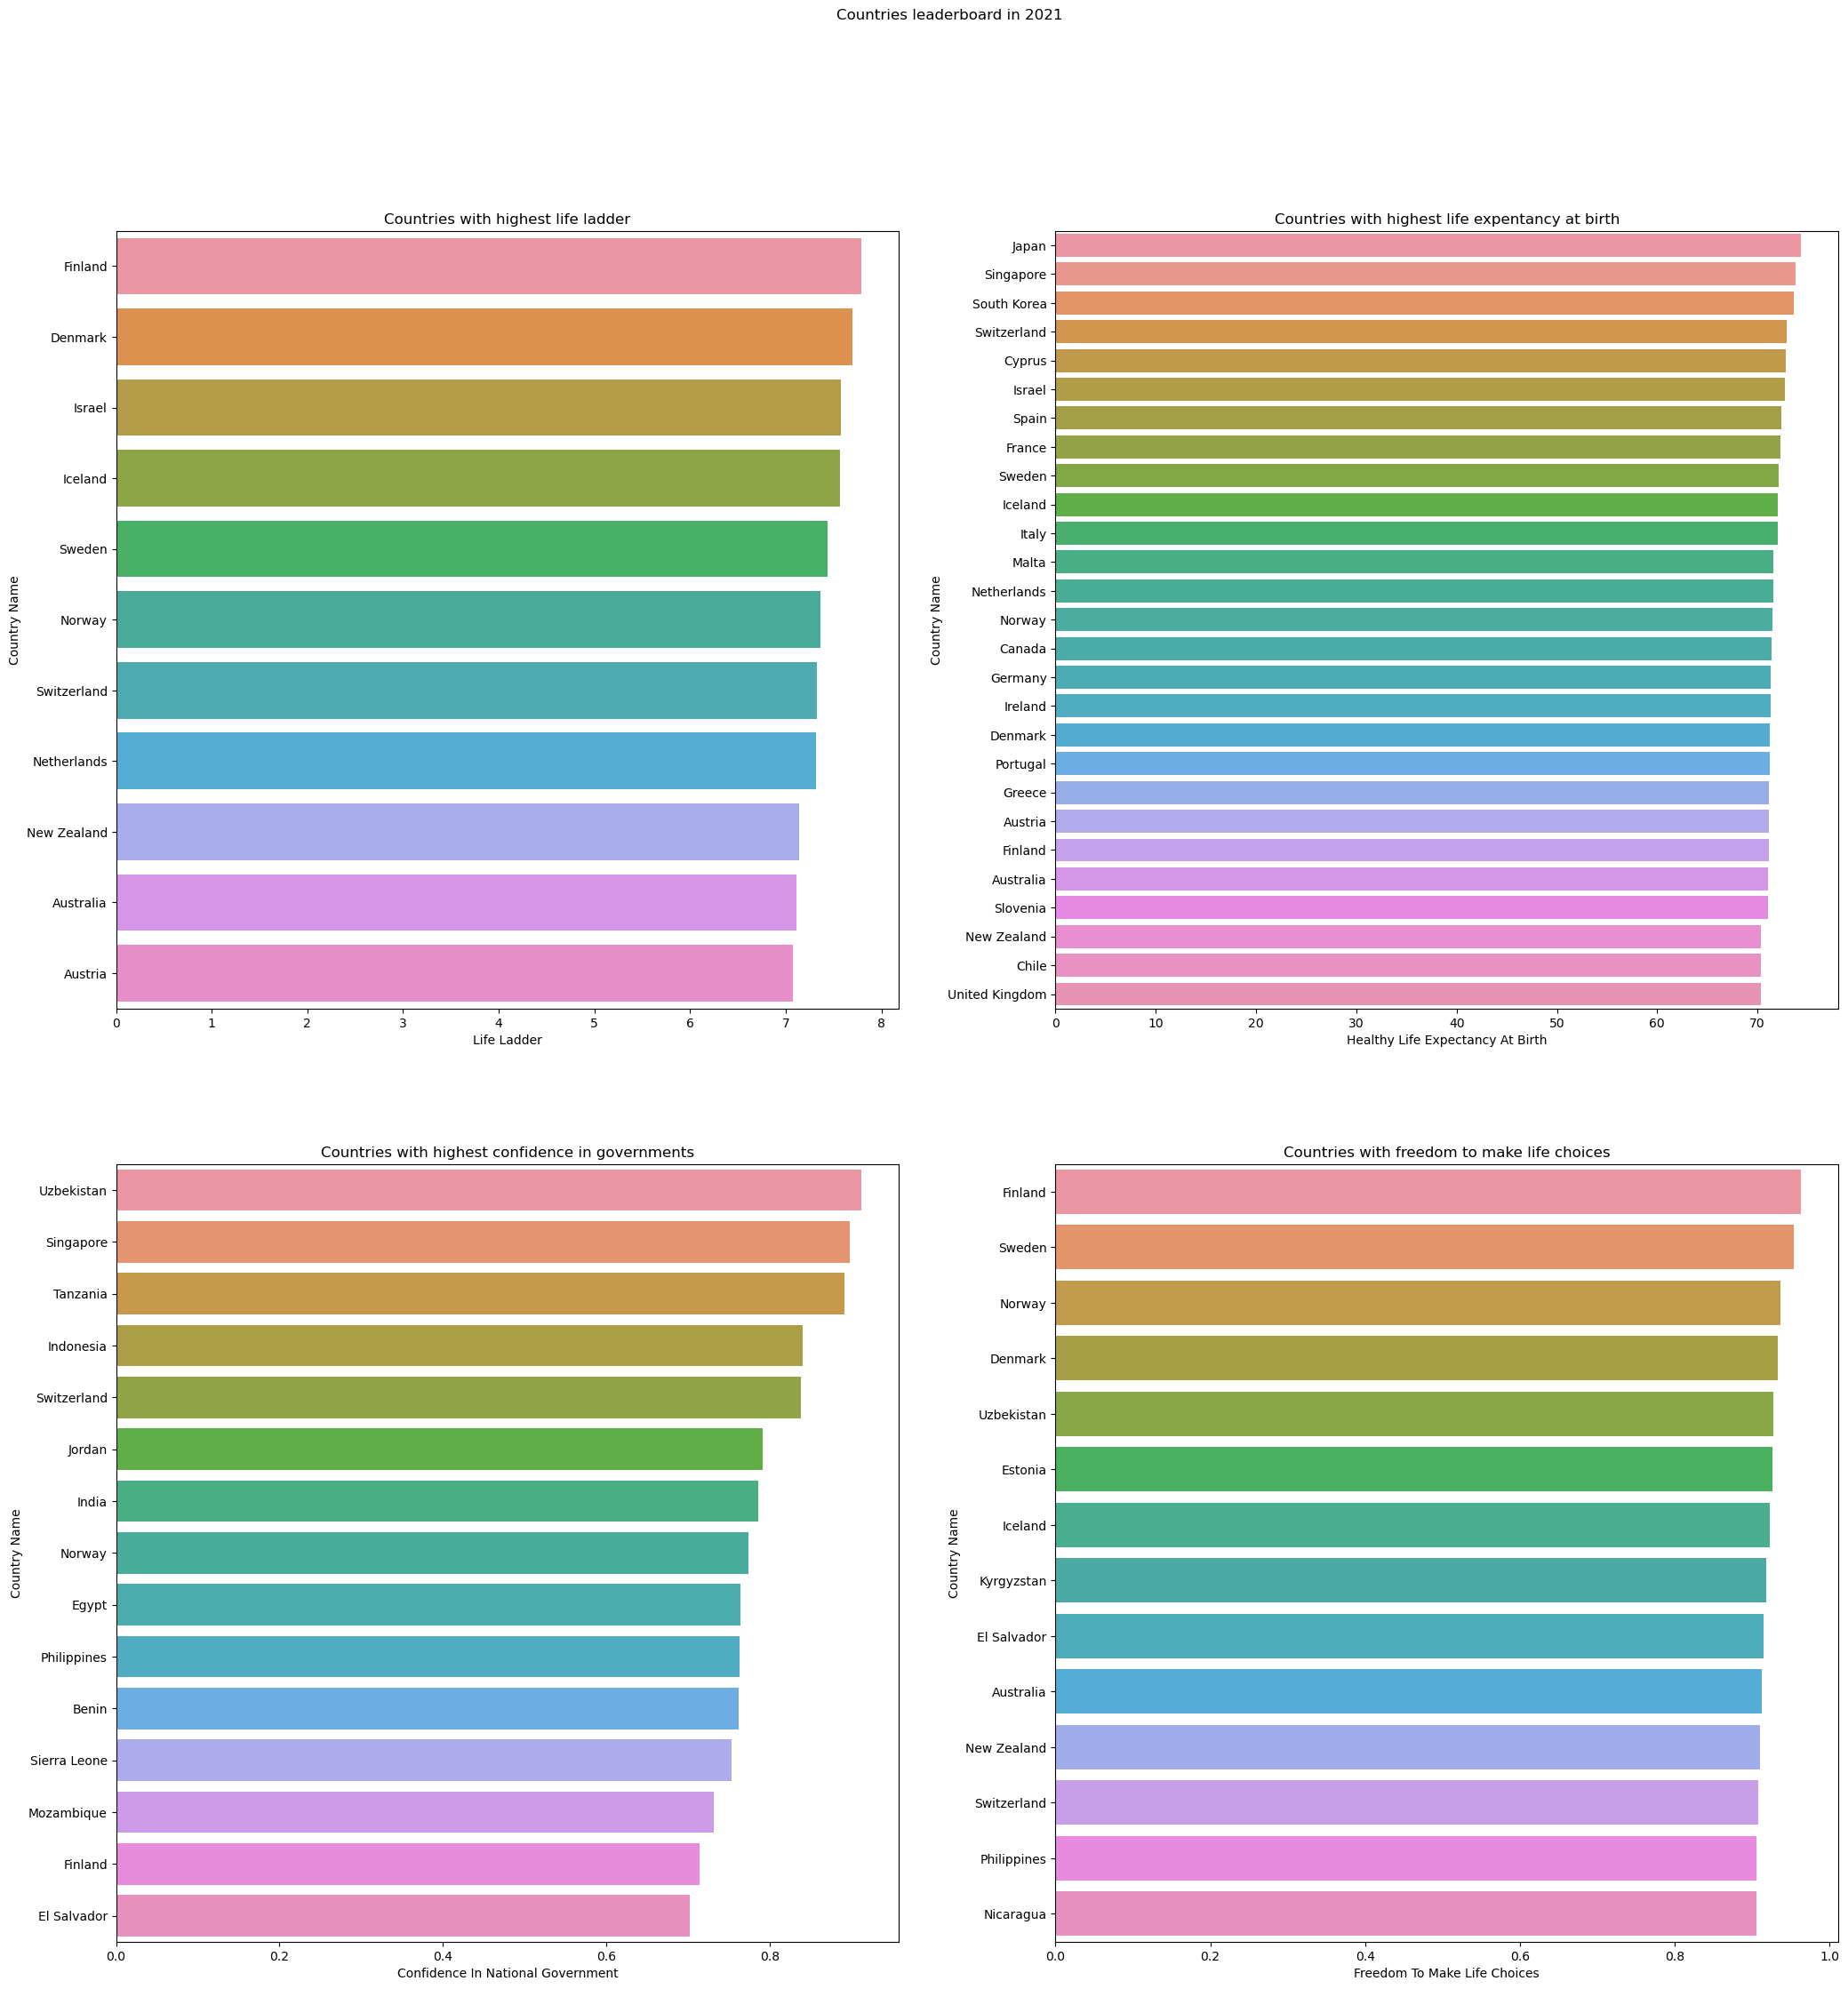

In [80]:
fig, axs = plt.subplots(2,2,figsize=(25, 25))
fig.suptitle("Countries leaderboard in 2021")
sns.barplot(data=df10, x=df10['Life Ladder'], y=df10['Country Name'], ax=axs[0,0]).set_title('Countries with highest life ladder')
sns.barplot(data=df11, x=df11['Healthy Life Expectancy At Birth'], y=df11['Country Name'], ax=axs[0,1]).set_title('Countries with highest life expentancy at birth')
sns.barplot(data=df12, x=df12['Confidence In National Government'], y=df12['Country Name'], ax=axs[1,0]).set_title('Countries with highest confidence in governments')
sns.barplot(data=df13, x=df13['Freedom To Make Life Choices'], y=df13['Country Name'], ax=axs[1,1]).set_title('Countries with freedom to make life choices')


In [72]:
df14 = df1.loc[(df1["Country Name"]=="Vietnam"),

               ["Country Name","Year","Life Ladder","Log GDP Per Capita","Social Support","Healthy Life Expectancy At Birth",
                "Freedom To Make Life Choices","Perceptions Of Corruption","Confidence In National Government"]]
df14.head()

,Country Name,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Perceptions Of Corruption,Confidence In National Government
2140,Vietnam,2008,5.480425,8.658332,0.804560,64.339996,0.888625,0.789238,0.866249
2141,Vietnam,2009,5.304265,8.700611,0.815026,64.419998,0.834134,0.837870,0.863494
2142,Vietnam,2010,5.295781,8.752191,0.786611,64.500000,0.831494,0.742637,0.850196
2143,Vietnam,2011,5.767344,8.803675,0.897655,64.580002,0.818404,0.742162,0.772131
2144,Vietnam,2012,5.534570,8.846539,0.775009,64.660004,0.856053,0.814885,0.856454
